### 1.  Import Required Libraries
Import the necessary libraries, including matplotlib, keras, numpy, sklearn.

In [18]:
# Importing required libraries
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

### 2.  Load and Subset MNIST Dataset
Load the MNIST dataset and create a subset for training and testing.

In [19]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Create a new subset dataset
subset_train_indices = []
subset_test_indices = []
for class_label in range(10):
    class_indices = np.where(y_train == class_label)[0]
    subset_train_indices.extend(class_indices[:60])
    class_indices = np.where(y_test == class_label)[0]
    subset_test_indices.extend(class_indices[60:70])

X_train = X_train[subset_train_indices]
y_train = y_train[subset_train_indices]
X_test = X_test[subset_test_indices]
y_test = y_test[subset_test_indices]

# Display the length of each part
print(f"Length of subset training data: {len(X_train)}")
print(f"Length of subset testing data: {len(X_test)}")

Length of subset training data: 600
Length of subset testing data: 100


### 3.  Display Dataset Information
Display the length of the subset training and testing data.

In [20]:
# Print the sum of each class label in the training data
for i in range(10):
    print(f"Sum of class {i} in training data: {sum(y_train == i)}")

# Print the sum of each class label in the testing data
for i in range(10):
    print(f"Sum of class {i} in testing data: {sum(y_test == i)}")

# Display the length of each part
print(f"Length of subset training data: {len(X_train)}")
print(f"Length of subset testing data: {len(X_test)}")

Sum of class 0 in training data: 60
Sum of class 1 in training data: 60
Sum of class 2 in training data: 60
Sum of class 3 in training data: 60
Sum of class 4 in training data: 60
Sum of class 5 in training data: 60
Sum of class 6 in training data: 60
Sum of class 7 in training data: 60
Sum of class 8 in training data: 60
Sum of class 9 in training data: 60
Sum of class 0 in testing data: 10
Sum of class 1 in testing data: 10
Sum of class 2 in testing data: 10
Sum of class 3 in testing data: 10
Sum of class 4 in testing data: 10
Sum of class 5 in testing data: 10
Sum of class 6 in testing data: 10
Sum of class 7 in testing data: 10
Sum of class 8 in testing data: 10
Sum of class 9 in testing data: 10
Length of subset training data: 600
Length of subset testing data: 100


### 4.  Shift Images in Dataset
Randomly shift the images in the training dataset.

In [21]:
# Shift Images in Dataset
X_shifted = np.copy(X_train)
for i in range(len(X_shifted)):
    shift = np.random.choice([-4, 4])  # Randomly select a shift value between from -4 and 4
    X_shifted[i] = np.roll(X_shifted[i], shift, axis=1)  # Shift the image horizontally
X_train  = np.copy(X_shifted)

### 5.  Display Random Images of the shifted Dataset
Display random images from the training dataset in a grid.

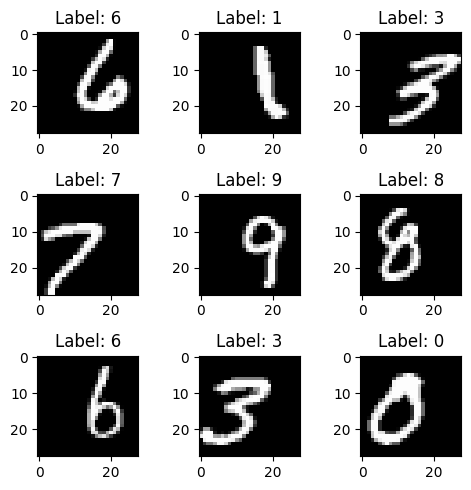

In [22]:
# Display random images in a grid
fig, axes = plt.subplots(3, 3, figsize=(5, 5))  # Create a 3x3 grid of subplots
for i, ax in enumerate(axes.flat):  # Loop over the flattened array of axes
    index = np.random.randint(0, X_train.shape[0])  # Select a random index from the training set
    image = X_train[index]  # Get the image at the selected index
    ax.imshow(image, cmap='gray')  # Display the image in grayscale
    ax.set_title(f'Label: {y_train[index]}')  # Set the title of the subplot to the label of the image
plt.tight_layout()  # Adjust the layout to minimize overlap of subplot elements
plt.show()  # Display the figure

### 6.  Flatten the Images
Flatten the images in the training and testing dataset.

In [23]:
# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

### 7.  Create and Train the Neural Network Classifier
Create a neural network classifier and train it on the flattened training dataset.

In [24]:
# Create and train the neural network classifier
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_flat.shape[1],)))  # First hidden layer with 128 neurons and ReLU activation function
model.add(Dense(64, activation='relu'))  # Second hidden layer with 64 neurons and ReLU activation function
model.add(Dense(10, activation='softmax'))  # Output layer with 10 neurons (one for each class) and softmax activation function


### 8.  Compile the model

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer, cross-entropy loss function, and accuracy as the evaluation metric
model.fit(X_train_flat, y_train, epochs=90, batch_size=32, verbose=1)  # Train the model for 10 epochs with a batch size of 32


Epoch 1/90
19/19 [==============================] - 1s 3ms/step - loss: 44.5154 - accuracy: 0.3000
Epoch 2/90
19/19 [==============================] - 0s 3ms/step - loss: 6.7893 - accuracy: 0.7133
Epoch 3/90
19/19 [==============================] - 0s 2ms/step - loss: 1.9643 - accuracy: 0.8483
Epoch 4/90
19/19 [==============================] - 0s 2ms/step - loss: 0.6281 - accuracy: 0.9500
Epoch 5/90
19/19 [==============================] - 0s 2ms/step - loss: 0.1675 - accuracy: 0.9817
Epoch 6/90
19/19 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9983
Epoch 7/90
19/19 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9983
Epoch 8/90
19/19 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 0.9983
Epoch 9/90
19/19 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 10/90
19/19 [==============================] - 0s 1ms/step - loss: 4.3904e-05 - accuracy: 1.0000
Epoch 11/90
19

### 9.  Evaluate accuracy on the train and train set


In [26]:
# Evaluate accuracy on the train set
train_accuracy_nn = model.evaluate(X_train_flat, y_train, verbose=0)[1]  # Evaluate the model on the training set
print(f"Neural Network Train Accuracy: {train_accuracy_nn}")  # Print the training accuracy

# Evaluate accuracy on the test set
test_accuracy_nn = model.evaluate(X_test_flat, y_test, verbose=0)[1]  # Evaluate the model on the test set
print(f"Neural Network Test Accuracy: {test_accuracy_nn}")  # Print the test accuracy

Neural Network Train Accuracy: 1.0
Neural Network Test Accuracy: 0.1899999976158142


### 10.  Standardize the Data
Standardize the flattened training and testing dataset.

In [27]:
# Standardize the data
# StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)  # Fit to data, then transform it.
X_test_scaled = scaler.transform(X_test_flat)  # Perform standardization by centering and scaling


### 11.  Create and Train the Neural Network Classifier on Scaled Data
Create a neural network classifier and train it on the standardized training dataset.

In [28]:
# Create and train the neural network classifier on scaled data
model_scaled = Sequential()
model_scaled.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # First hidden layer with 128 neurons and ReLU activation function
model_scaled.add(Dense(64, activation='relu'))  # Second hidden layer with 64 neurons and ReLU activation function
model_scaled.add(Dense(10, activation='softmax'))  # Output layer with 10 neurons (one for each class) and softmax activation function

model_scaled.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer, cross-entropy loss function, and accuracy as the evaluation metric
model_scaled.fit(X_train_scaled, y_train, epochs=90, batch_size=32, verbose=1)  # Train the model for 10 epochs with a batch size of 32


Epoch 1/90
19/19 [==============================] - 1s 2ms/step - loss: 1.8498 - accuracy: 0.3933
Epoch 2/90
19/19 [==============================] - 0s 2ms/step - loss: 0.7097 - accuracy: 0.8483
Epoch 3/90
19/19 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.9283
Epoch 4/90
19/19 [==============================] - 0s 2ms/step - loss: 0.1731 - accuracy: 0.9783
Epoch 5/90
19/19 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.9917
Epoch 6/90
19/19 [==============================] - 0s 2ms/step - loss: 0.0554 - accuracy: 1.0000
Epoch 7/90
19/19 [==============================] - 0s 2ms/step - loss: 0.0347 - accuracy: 1.0000
Epoch 8/90
19/19 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 1.0000
Epoch 9/90
19/19 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 1.0000
Epoch 10/90
19/19 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 1.0000
Epoch 11/90
19/19 [

### 12.  Evaluate Classifier Accuracy on Scaled Data
Evaluate the accuracy of the classifier on the standardized training and testing dataset.

In [29]:
# Evaluate accuracy on the train set using scaled data
train_accuracy_nn_scaled = model_scaled.evaluate(X_train_scaled, y_train, verbose=0)[1]  # Evaluate the model on the training set
print(f"Neural Network Scaled Train Accuracy: {train_accuracy_nn_scaled}")  # Print the training accuracy

# Evaluate accuracy on the test set using scaled data
test_accuracy_nn_scaled = model_scaled.evaluate(X_test_scaled, y_test, verbose=0)[1]  # Evaluate the model on the test set
print(f"Neural Network Scaled Test Accuracy: {test_accuracy_nn_scaled}")  # Print the test accuracy

Neural Network Scaled Train Accuracy: 1.0
Neural Network Scaled Test Accuracy: 0.28999999165534973


### 13.  Apply Min-Max Scaling to the Data
Apply min-max scaling to the flattened training and testing dataset.

In [30]:
# Min-max scaling
# MinMaxScaler transforms features by scaling each feature to a given range.
scaler = MinMaxScaler()
# Apply min-max scaling to the training data
X_train_mmscaled = scaler.fit_transform(X_train_flat)
# Apply min-max scaling to the test data
X_test_mmscaled = scaler.transform(X_test_flat)

### 14.  Create and Train the Neural Network Classifier on Min-Max Scaled Data
Create a neural network classifier and train it on the min-max scaled training dataset.

In [31]:
# Create and train the neural network classifier on scaled data
model_scaled = Sequential()
model_scaled.add(Dense(128, activation='relu', input_shape=(X_train_mmscaled.shape[1],)))  # First hidden layer with 128 neurons and ReLU activation function
model_scaled.add(Dense(64, activation='relu'))  # Second hidden layer with 64 neurons and ReLU activation function
model_scaled.add(Dense(10, activation='softmax'))  # Output layer with 10 neurons (one for each class) and softmax activation function
model_scaled.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer, cross-entropy loss function, and accuracy as the evaluation metric
model_scaled.fit(X_train_mmscaled, y_train, epochs=90, batch_size=32, verbose=1)  # Train the model for 10 epochs with a batch size of 32


Epoch 1/90
19/19 [==============================] - 1s 3ms/step - loss: 2.0209 - accuracy: 0.3433
Epoch 2/90
19/19 [==============================] - 0s 2ms/step - loss: 1.2355 - accuracy: 0.7233
Epoch 3/90
19/19 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.8633
Epoch 4/90
19/19 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.9200
Epoch 5/90
19/19 [==============================] - 0s 2ms/step - loss: 0.2869 - accuracy: 0.9467
Epoch 6/90
19/19 [==============================] - 0s 2ms/step - loss: 0.1874 - accuracy: 0.9800
Epoch 7/90
19/19 [==============================] - 0s 2ms/step - loss: 0.1272 - accuracy: 0.9883
Epoch 8/90
19/19 [==============================] - 0s 2ms/step - loss: 0.0873 - accuracy: 0.9967
Epoch 9/90
19/19 [==============================] - 0s 2ms/step - loss: 0.0673 - accuracy: 0.9967
Epoch 10/90
19/19 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 1.0000
Epoch 11/90
19/19 [

### 15.  Evaluate Classifier Accuracy on Min-Max Scaled Data
Evaluate the accuracy of the classifier on the min-max scaled training and testing dataset.

In [32]:
# Evaluate accuracy on the train set using scaled data
train_accuracy_nn_scaled = model_scaled.evaluate(X_train_mmscaled, y_train, verbose=0)[1]  # Evaluate the model on the training set
print(f"Neural Network Scaled Train Accuracy: {train_accuracy_nn_scaled}")  # Print the training accuracy

# Evaluate accuracy on the test set using scaled data
test_accuracy_nn_scaled = model_scaled.evaluate(X_test_mmscaled, y_test, verbose=0)[1]  # Evaluate the model on the test set
print(f"Neural Network Scaled Test Accuracy: {test_accuracy_nn_scaled}")  # Print the test accuracy

Neural Network Scaled Train Accuracy: 1.0
Neural Network Scaled Test Accuracy: 0.23999999463558197
